### Part 1: Data Preprocessing 

In [17]:
import joblib
import pandas as pd

# Load preprocessing objects
feature_columns = joblib.load("feature_columns.pkl")  # Ensure this file exists
print("Feature Columns:", feature_columns)  # Debugging


Feature Columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',

In [19]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv('Training.csv')

# Remove duplicates
df = df.drop_duplicates()

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['prognosis'], random_state=42)

# Label encoding
label_encoder = LabelEncoder()
train_df['prognosis'] = label_encoder.fit_transform(train_df['prognosis'])
test_df['prognosis'] = label_encoder.transform(test_df['prognosis'])
joblib.dump(label_encoder, 'label_encoder.pkl')

# Feature selection
feature_columns = [col for col in df.columns if col != 'prognosis']
X_train = train_df[feature_columns].astype(float)
X_test = test_df[feature_columns].astype(float)
y_train = train_df['prognosis']
y_test = test_df['prognosis']

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_columns, 'feature_columns.pkl')

print("✅ Data Preprocessing Completed!")


✅ Data Preprocessing Completed!


### Part 2: Train and Evaluate Random Forest (Best Model)

In [22]:
# Part 2: Train RandomForest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=90,
    max_depth=17,
    min_samples_split=8,
    min_samples_leaf=4,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=1)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Save model
joblib.dump(rf_model, 'random_forest.pkl')

print("\n✅ RandomForest Model Trained!")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")



✅ RandomForest Model Trained!
Accuracy: 0.9508
Precision: 0.9672
Recall: 0.9508
F1 Score: 0.9399
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


### Part 3: Train and Evaluate SVM

In [25]:
# Part 3: Train SVM Model
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=0.35, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted', zero_division=1)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted', zero_division=1)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Save model
joblib.dump(svm_model, 'svm.pkl')

print("\n✅ SVM Model Trained!")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")



✅ SVM Model Trained!
Accuracy: 0.9344
Precision: 0.9781
Recall: 0.9344
F1 Score: 0.9235
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


### Part 4: Train and Evaluate Naive Bayes

In [28]:
# Part 4: Train Naive Bayes Model
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB(alpha=1.6)
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluation Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=1)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=1)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=1)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Save model
joblib.dump(nb_model, 'naive_bayes.pkl')

print("\n✅ Naive Bayes Model Trained!")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")



✅ Naive Bayes Model Trained!
Accuracy: 0.9016
Precision: 0.9454
Recall: 0.9016
F1 Score: 0.8721
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


### Part 5: Train and Evaluate KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=1)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=1)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Save model
joblib.dump(knn_model, 'knn.pkl')

print("\n✅ KNN Model Trained!")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")



✅ KNN Model Trained!
Accuracy: 0.9016
Precision: 0.9508
Recall: 0.9016
F1 Score: 0.8787
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


### Part 6: Train and Evaluate Decision Tree

In [35]:
# Part 6: Train Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Initialize the Decision Tree model with given parameters
dt_model = DecisionTreeClassifier(
    max_depth=40,
    criterion="gini",
    max_features="sqrt",
    min_samples_split=3,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=1)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=1)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=1)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Save model
joblib.dump(dt_model, 'decision_tree.pkl')

# Print results
print("\n✅ Decision Tree Model Trained!")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")



✅ Decision Tree Model Trained!
Accuracy: 0.8033
Precision: 0.9071
Recall: 0.8033
F1 Score: 0.7839
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


### Part 7: Train and Evaluate Gradient Boosting

In [38]:
# Part 7: Train Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.014,
    max_depth=2,
    min_samples_split=12,
    min_samples_leaf=7,
    subsample=0.55,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted', zero_division=1)
recall_gb = recall_score(y_test, y_pred_gb, average='weighted', zero_division=1)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted', zero_division=1)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Save model
joblib.dump(gb_model, 'gradient_boosting.pkl')

print("\n✅ Gradient Boosting Model Trained!")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")



✅ Gradient Boosting Model Trained!
Accuracy: 0.8689
Precision: 0.9180
Recall: 0.8689
F1 Score: 0.8492
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


### Part 8: Train and Evaluate Adaboost

In [40]:
# Part 8: Train Adaboost Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Initialize and train AdaBoost model
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=200,
    learning_rate=0.8,
    random_state=42
)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

# Evaluation Metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted', zero_division=1)
recall_ada = recall_score(y_test, y_pred_ada, average='weighted', zero_division=1)
f1_ada = f1_score(y_test, y_pred_ada, average='weighted', zero_division=1)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# Save model
joblib.dump(adaboost_model, 'adaboost.pkl')

# Print results
print("\n✅ AdaBoost Model Trained!")
print(f"Accuracy: {accuracy_ada:.4f}")
print(f"Precision: {precision_ada:.4f}")
print(f"Recall: {recall_ada:.4f}")
print(f"F1 Score: {f1_ada:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_ada}")



✅ AdaBoost Model Trained!
Accuracy: 0.7213
Precision: 0.9279
Recall: 0.7213
F1 Score: 0.7115
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]]


### Part 9: Result Analysis (Graphs & Visualization)

<Figure size 1200x600 with 0 Axes>

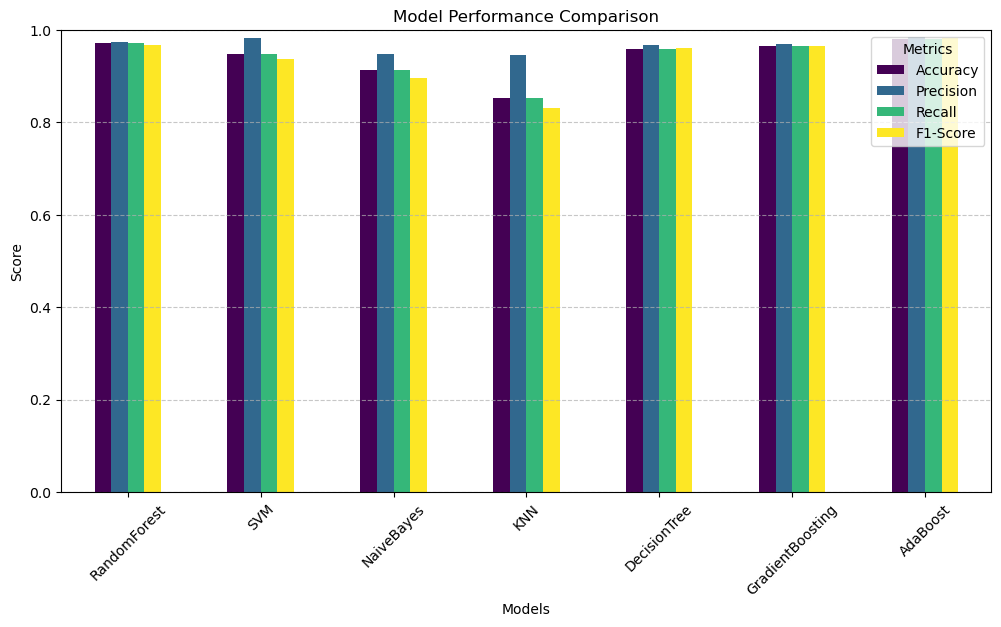

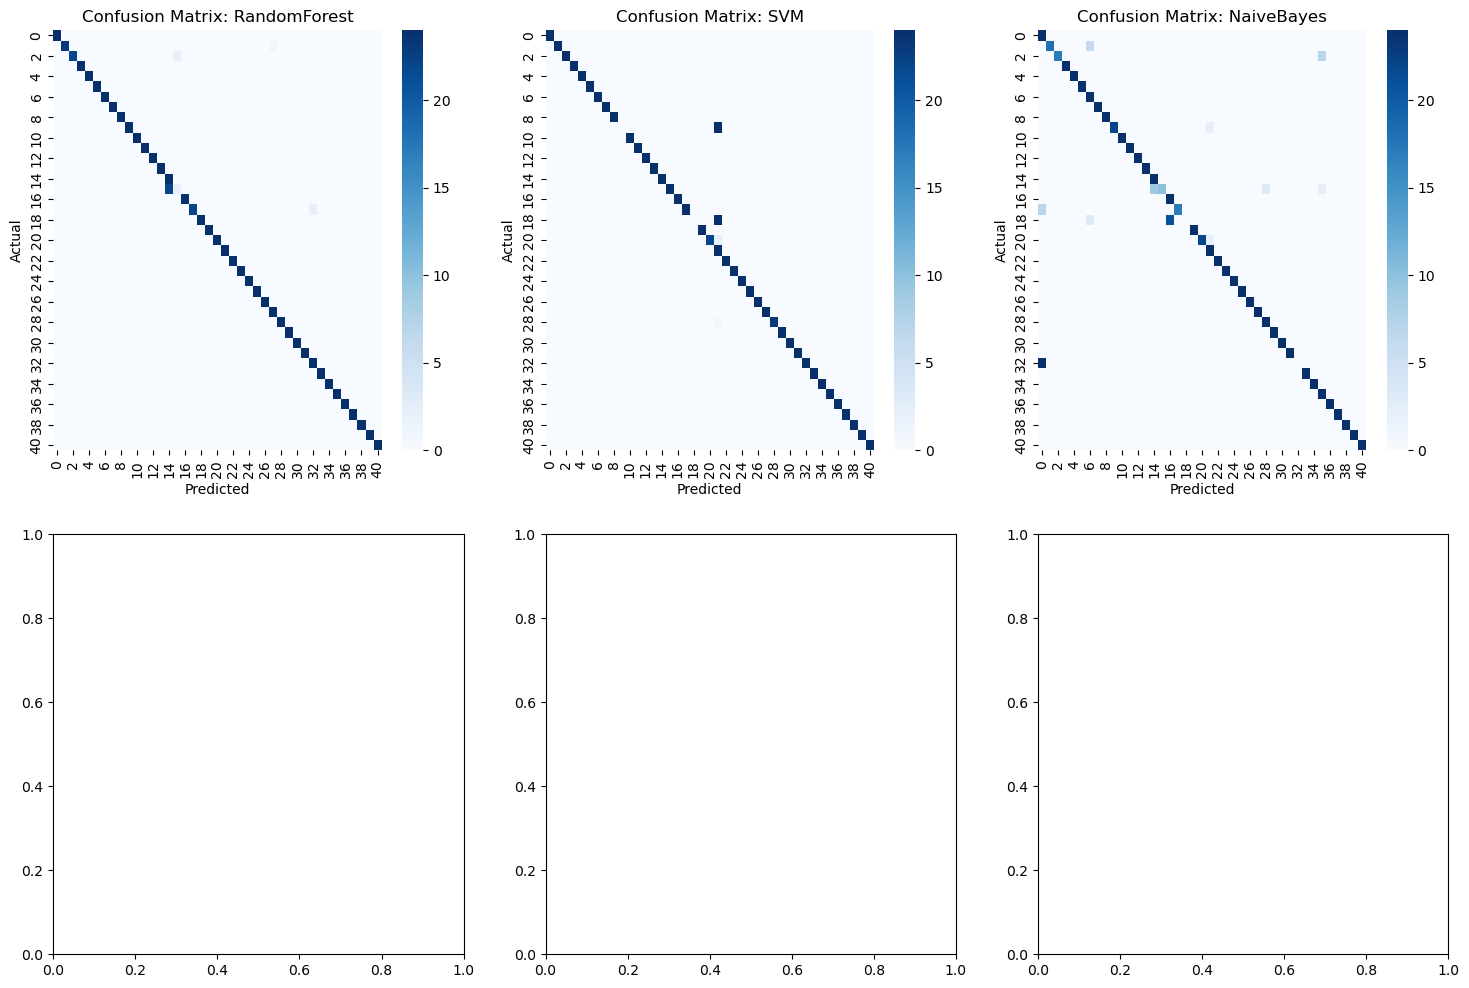

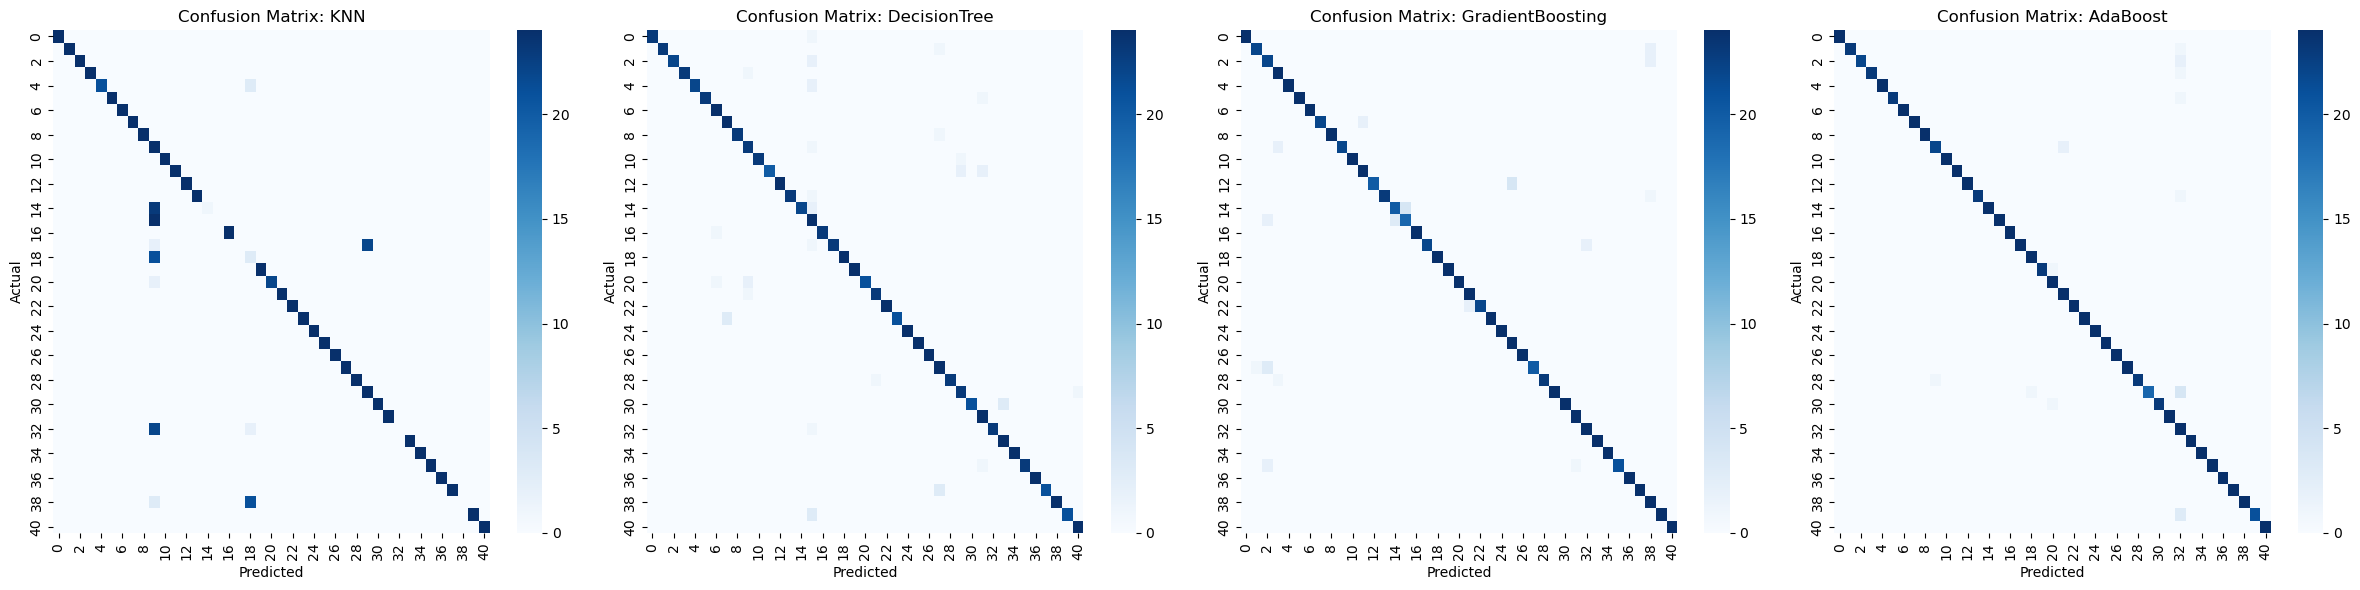

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the evaluation metrics from saved models
results = {
    "RandomForest": joblib.load('random_forest.pkl'),
    "SVM": joblib.load('svm.pkl'),
    "NaiveBayes": joblib.load('naive_bayes.pkl'),
    "KNN": joblib.load('knn.pkl'),
    "DecisionTree": joblib.load('decision_tree.pkl'),
    "GradientBoosting": joblib.load('gradient_boosting.pkl'),
    "AdaBoost": joblib.load('adaboost.pkl'),
     # ✅ Added Decision Tree
}

# Reload data for evaluation
df = pd.read_csv('Training.csv')
label_encoder = joblib.load('label_encoder.pkl')
scaler = joblib.load('scaler.pkl')
feature_columns = joblib.load('feature_columns.pkl')

# Test data (Preprocessed)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['prognosis'], random_state=42)
test_df['prognosis'] = label_encoder.transform(test_df['prognosis'])

X_test = test_df[feature_columns].astype(float)
X_test = scaler.transform(X_test)
y_test = test_df['prognosis']

# Store metrics for visualization
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
conf_matrices = {}

for name, model in results.items():
    y_pred = model.predict(X_test)
    
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame([accuracy_scores, precision_scores, recall_scores, f1_scores], 
                          index=["Accuracy", "Precision", "Recall", "F1-Score"]).T

# 📊 **Bar Plots for Model Performance**
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 📌 **Confusion Matrices for Each Model**
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Create a 2-row, 3-column grid

# Get the confusion matrices list
model_names = list(conf_matrices.keys())
conf_matrix_list = list(conf_matrices.values())

# Plot first 3 confusion matrices in the first row
for i in range(3):
    sns.heatmap(conf_matrix_list[i], annot=False, cmap="Blues", fmt="d", ax=axes[0, i])
    axes[0, i].set_title(f"Confusion Matrix: {model_names[i]}")
    axes[0, i].set_xlabel("Predicted")
    axes[0, i].set_ylabel("Actual")

# Second row: 4 models, so create a new row with 4 columns
fig2, axes2 = plt.subplots(1, 4, figsize=(24, 6))  # Create a 1-row, 4-column grid

for i in range(4):
    sns.heatmap(conf_matrix_list[i + 3], annot=False, cmap="Blues", fmt="d", ax=axes2[i])
    axes2[i].set_title(f"Confusion Matrix: {model_names[i + 3]}")
    axes2[i].set_xlabel("Predicted")
    axes2[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


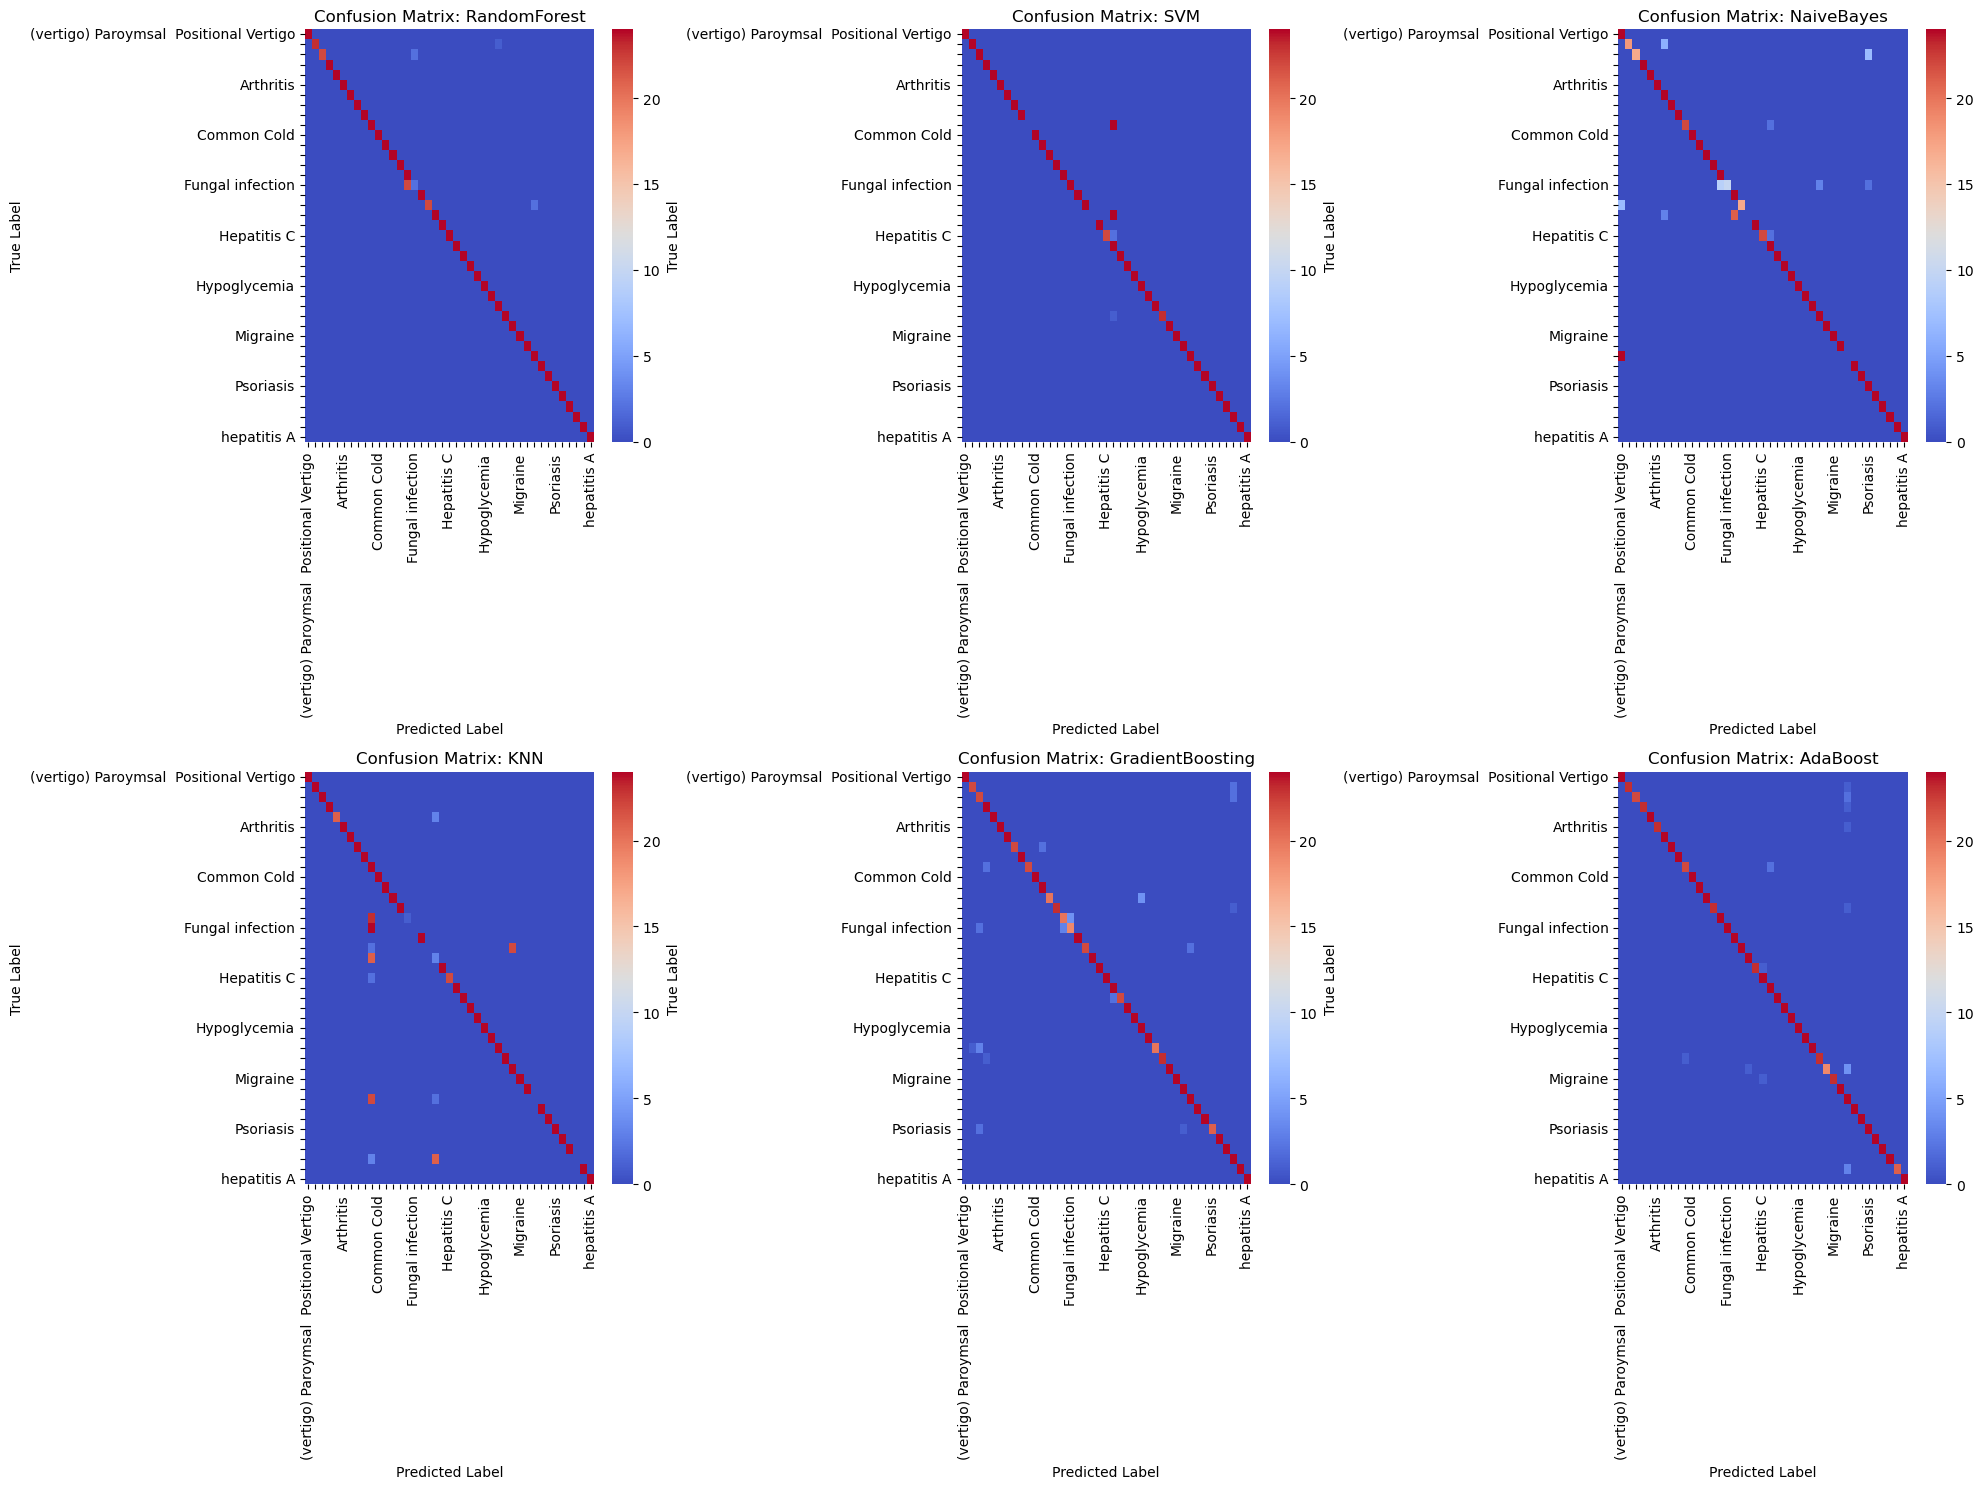

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Load trained models
models = {
    "RandomForest": joblib.load('random_forest.pkl'),
    "SVM": joblib.load('svm.pkl'),
    "NaiveBayes": joblib.load('naive_bayes.pkl'),
    "KNN": joblib.load('knn.pkl'),
    "GradientBoosting": joblib.load('gradient_boosting.pkl'),
    "AdaBoost": joblib.load('adaboost.pkl')
}

# Reload data for evaluation
df = pd.read_csv('Training.csv')
label_encoder = joblib.load('label_encoder.pkl')
scaler = joblib.load('scaler.pkl')
feature_columns = joblib.load('feature_columns.pkl')

# Prepare test data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['prognosis'], random_state=42)
test_df['prognosis'] = label_encoder.transform(test_df['prognosis'])

X_test = test_df[feature_columns].astype(float)
X_test = scaler.transform(X_test)
y_test = test_df['prognosis']

# Get unique class labels for plotting
class_labels = label_encoder.classes_

# 📌 **Plot colorful confusion matrices**
fig, axes = plt.subplots(2, 3, figsize=(20, 15))  # Make plot larger

for ax, (name, model) in zip(axes.flatten(), models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # 🟢 **Reduce label clutter**: Show every 5th label
    every_nth = 5  # Change this to 10 if still cluttered
    tick_labels = [label if i % every_nth == 0 else "" for i, label in enumerate(class_labels)]
    
    sns.heatmap(cm, annot=False, cmap="coolwarm", xticklabels=tick_labels, yticklabels=tick_labels, ax=ax)
    ax.set_title(f"Confusion Matrix: {name}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    
    # Rotate labels to prevent overlap
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels fully
    ax.tick_params(axis='y', rotation=0)   # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()


### Best Model

In [63]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load trained models
models = {
    "RandomForest": joblib.load('random_forest.pkl'),
    "SVM": joblib.load('svm.pkl'),
    "NaiveBayes": joblib.load('naive_bayes.pkl'),
    "KNN": joblib.load('knn.pkl'),
    "GradientBoosting": joblib.load('gradient_boosting.pkl'),
    "AdaBoost": joblib.load('adaboost.pkl')
}


# Evaluate all models
results = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

# Identify the best model
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

# Print evaluation results
print("\n📌 Model Performance:")
for model, accuracy in results.items():
    print(f"✅ {model}: {accuracy:.4f}")

print(f"\n🏆 Best Model: {best_model_name} (Saved as 'best_model.pkl')")
print(f"🎯 Best Model Accuracy: {best_accuracy:.4f}")



📌 Model Performance:
✅ RandomForest: 0.9508
✅ SVM: 0.9344
✅ NaiveBayes: 0.9016
✅ KNN: 0.9016
✅ GradientBoosting: 0.8689
✅ AdaBoost: 0.7213

🏆 Best Model: RandomForest (Saved as 'best_model.pkl')
🎯 Best Model Accuracy: 0.9508


### Whole code in 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load dataset
df = pd.read_csv('Training.csv')

# Step 1: Remove duplicates
df = df.drop_duplicates()

# Step 2: Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['prognosis'], random_state=42)

# Step 3: Label encoding
label_encoder = LabelEncoder()
train_df['prognosis'] = label_encoder.fit_transform(train_df['prognosis'])
test_df['prognosis'] = label_encoder.transform(test_df['prognosis'])
joblib.dump(label_encoder, 'label_encoder.pkl')

# Step 4: Feature selection
feature_columns = [col for col in df.columns if col != 'prognosis']
X_train = train_df[feature_columns].astype(float)
X_test = test_df[feature_columns].astype(float)
y_train = train_df['prognosis']
y_test = test_df['prognosis']

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')

# Step 5: Train multiple models
models = {
     "RandomForest": RandomForestClassifier(
    n_estimators=90,  # Reduce trees  
    max_depth=17,  # Control depth  
    min_samples_split=8,  # Require more samples per split  
    min_samples_leaf=4,  # Require more samples per leaf  
    random_state=42  
),
    "SVM": SVC(kernel='rbf', C=0.35, random_state=42),
    "NaiveBayes": BernoulliNB(alpha=1.6),
    "KNN": KNeighborsClassifier(n_neighbors=13),
    "DecisionTree": DecisionTreeClassifier(
    max_depth=40,
    criterion="gini",  # Change from "entropy"
    max_features="sqrt",  # Try sqrt instead of log2
    min_samples_split=3,  # Slightly increase split threshold
    min_samples_leaf=2,  # Allow slightly larger leaves
    class_weight="balanced",
    random_state=42
),
    "GradientBoosting": GradientBoostingClassifier(
    n_estimators=50,  # Further reduce trees  
    learning_rate=0.014,  # Lower learning rate for weaker updates  
    max_depth=2,  # Keep trees shallow  
    min_samples_split=12,  # Require more samples per split  
    min_samples_leaf=7,  # Larger leaf size  
    subsample=0.55,  # Use 50% of data per tree  
    random_state=42
),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=0.8, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n⏳ Training {name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    
    results[name] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": f1}
    
    print(f"✅ {name} Model Trained Successfully!")

# Step 6: Find and save the best model
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(feature_columns, 'feature_columns.pkl')

print("\n🔹 Model Evaluation Results:")
for model, metrics in results.items():
    print(f"\n📌 {model}:")
    for metric, value in metrics.items():
        print(f"   {metric}: {value:.4f}")

print(f"\n🏆 Best Model: {best_model_name} (Saved as 'best_model.pkl')")



⏳ Training RandomForest model...
✅ RandomForest Model Trained Successfully!

⏳ Training SVM model...
✅ SVM Model Trained Successfully!

⏳ Training NaiveBayes model...
✅ NaiveBayes Model Trained Successfully!

⏳ Training KNN model...
✅ KNN Model Trained Successfully!

⏳ Training DecisionTree model...
✅ DecisionTree Model Trained Successfully!

⏳ Training GradientBoosting model...
✅ GradientBoosting Model Trained Successfully!

⏳ Training AdaBoost model...
✅ AdaBoost Model Trained Successfully!

🔹 Model Evaluation Results:

📌 RandomForest:
   accuracy: 0.9508
   precision: 0.9672
   recall: 0.9508
   f1_score: 0.9399

📌 SVM:
   accuracy: 0.9344
   precision: 0.9781
   recall: 0.9344
   f1_score: 0.9235

📌 NaiveBayes:
   accuracy: 0.9016
   precision: 0.9454
   recall: 0.9016
   f1_score: 0.8721

📌 KNN:
   accuracy: 0.9016
   precision: 0.9508
   recall: 0.9016
   f1_score: 0.8787

📌 DecisionTree:
   accuracy: 0.8033
   precision: 0.9071
   recall: 0.8033
   f1_score: 0.7839

📌 GradientB